# Проект - Кластеризация К-средних (K-Means Clustering)


Источник данных: все данные былы созданы на основе данных следующего источника: 
https://www.cia.gov/library/publications/the-world-factbook/docs/faqs.html

## Цель: 

### Найти похожие между собой страны и регионы, экспериментируя с различным количеством кластеров. <br><br> Что означают полученные кластеры? <br><br> 

----


**Импортируем необходимые библиотеки и загрузим данные в датайфрейм Pandas.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv('../data/CIA_Country_Facts.csv')

## Исследование данных (Exploratory Data Analysis)

**Посмотрим на строки и колонки в данных, в том числе на типы данных для колонок.**

In [4]:
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Population,227.0,2.874028e+07,1.178913e+08,7026.000,437624.00000,4786994.000,1.749777e+07,1.313974e+09
Area (sq. mi.),227.0,5.982270e+05,1.790282e+06,2.000,4647.50000,86600.000,4.418110e+05,1.707520e+07
Pop. Density (per sq. mi.),227.0,3.790471e+02,1.660186e+03,0.000,29.15000,78.800,1.901500e+02,1.627150e+04
Coastline (coast/area ratio),227.0,2.116533e+01,7.228686e+01,0.000,0.10000,0.730,1.034500e+01,8.706600e+02
Net migration,224.0,3.812500e-02,4.889269e+00,-20.990,-0.92750,0.000,9.975000e-01,2.306000e+01
Infant mortality (per 1000 births),224.0,3.550696e+01,3.538990e+01,2.290,8.15000,21.000,5.570500e+01,1.911900e+02
GDP ($ per capita),226.0,9.689823e+03,1.004914e+04,500.000,1900.00000,5550.000,1.570000e+04,5.510000e+04
Literacy (%),209.0,8.283828e+01,1.972217e+01,17.600,70.60000,92.500,9.800000e+01,1.000000e+02
Phones (per 1000),223.0,2.360614e+02,2.279918e+02,0.200,37.80000,176.200,3.896500e+02,1.035600e+03
Arable (%),225.0,1.379711e+01,1.304040e+01,0.000,3.22000,10.420,2.000000e+01,6.211000e+01


# Визуализация данных

**Построим гистограмму для колонки Population.**

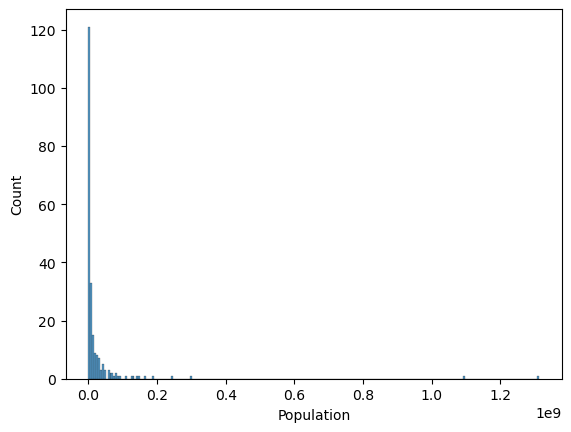

In [7]:
sns.histplot(data=df,x='Population');

**Гистограмма очень перекошена из-за нескольких очень больших стран. Поменяем график таким образом, чтобы показывать только страны с населением меньше 0.5 миллиарда людей.**

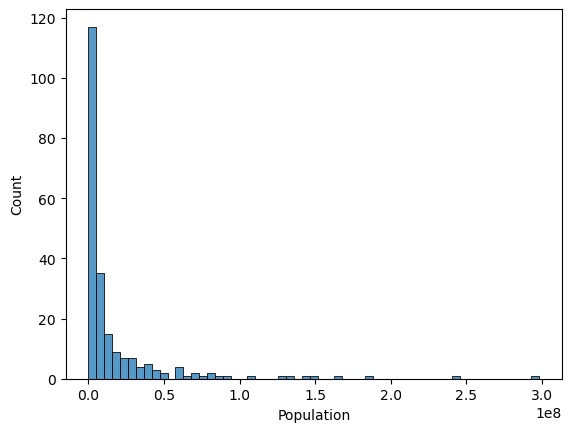

In [8]:
sns.histplot(data=df[df['Population']<500000000],x='Population');

**Исследуем GDP (ВВП - Валовый Внутренний Продукт) и регионы (Regions). Построим график barchart, на котором изобразим среднее ВВП на душу населения (GDP per Capita) для каждого региона.**

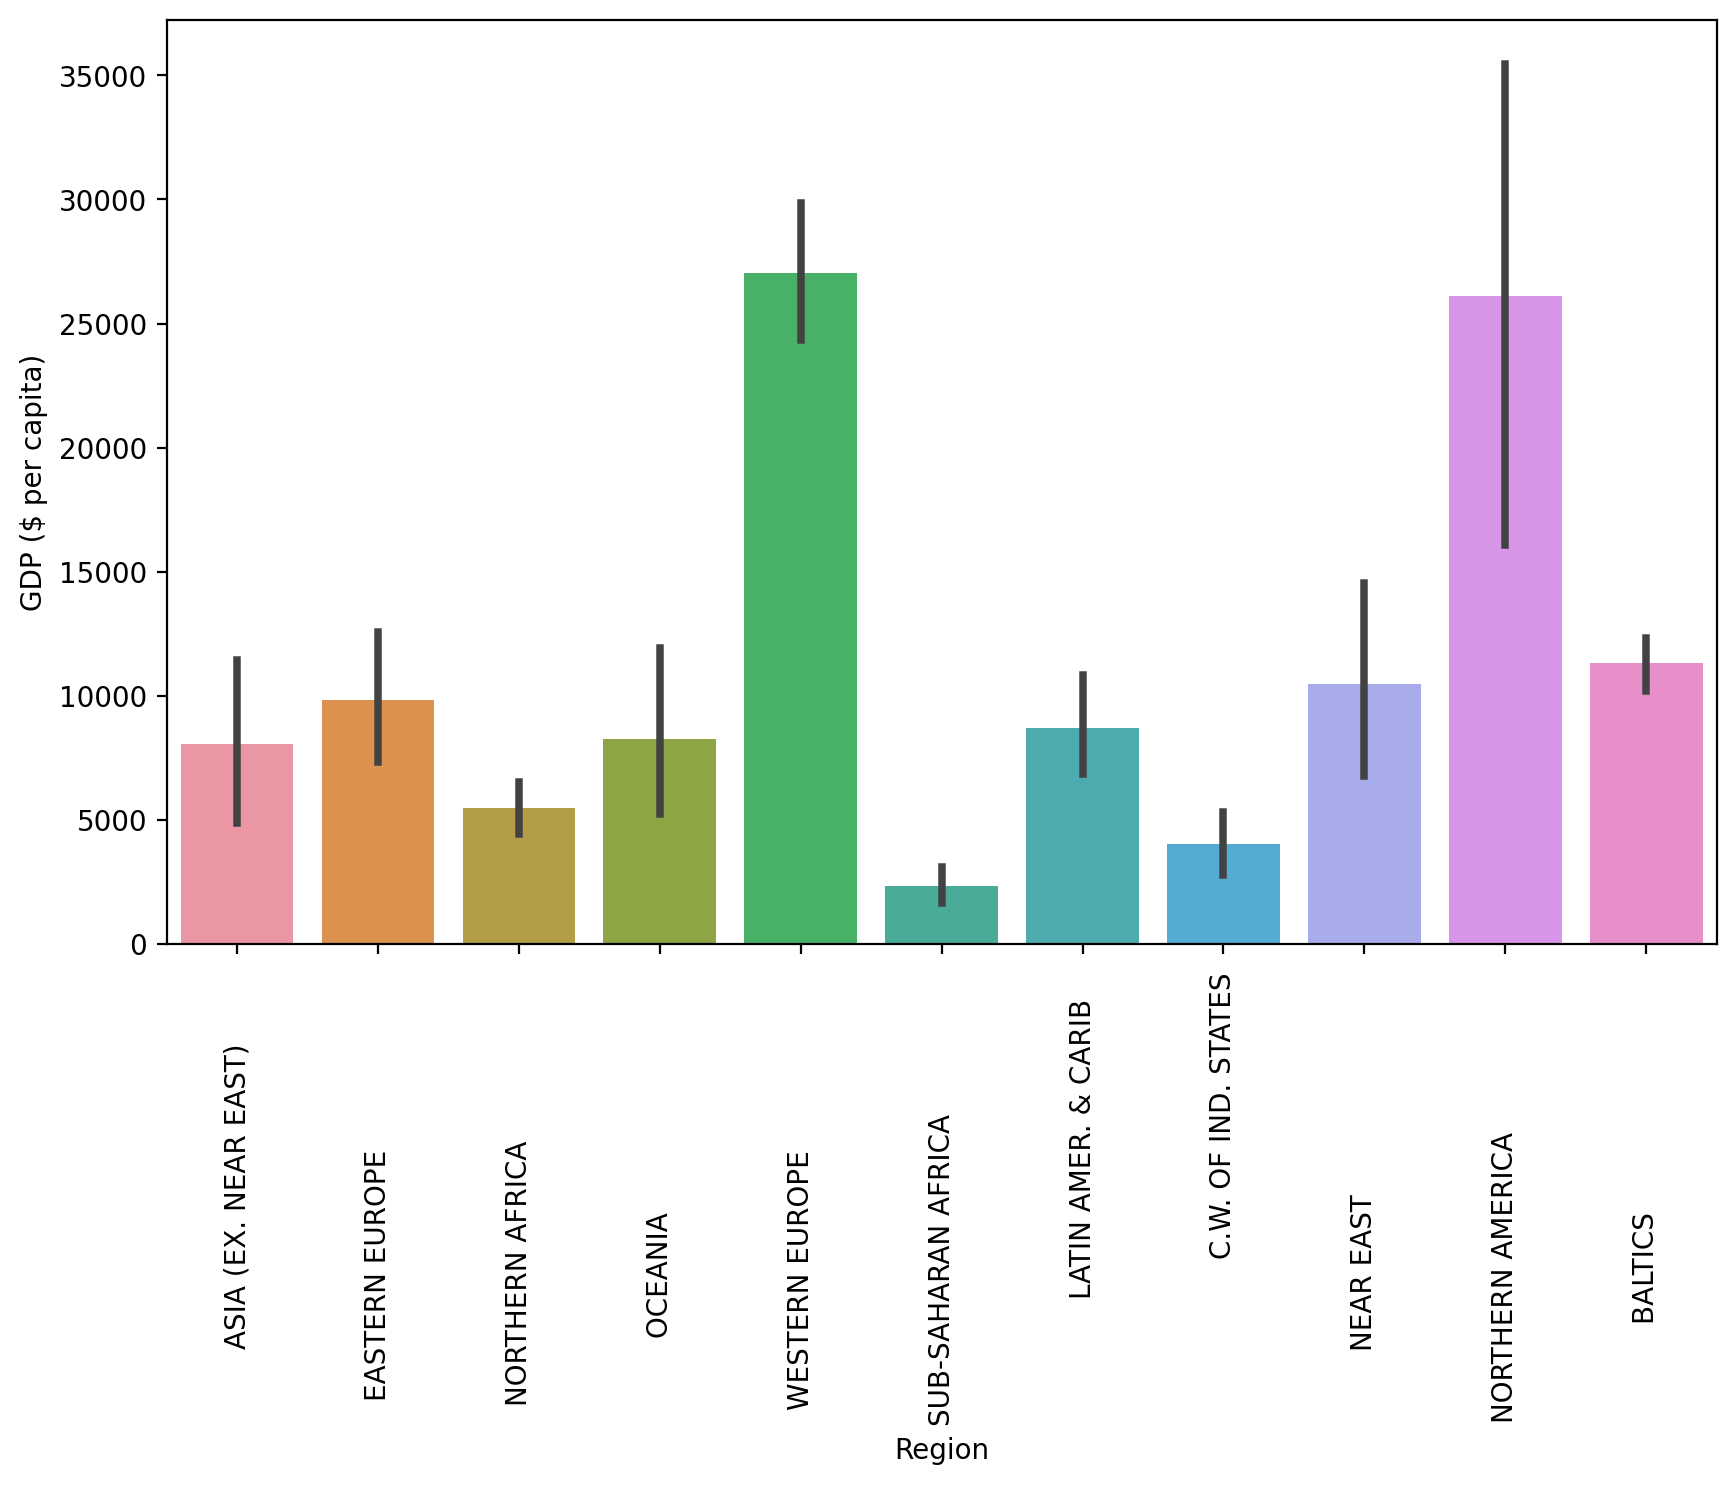

In [9]:
plt.figure(figsize=(10,6),dpi=200)
sns.barplot(data=df,y='GDP ($ per capita)',x='Region',estimator=np.mean)
plt.xticks(rotation=90);

На графике мы видим два региона, ВВП в которых существенно выше, чем в других регионах. При чем в одном из этих регионов (Северной Америке) достаточно большое среднее квадратическое отклонение.

**Построим график scatterplot для визуализации связи между колонками "кол-во телефонов на одну тысячу человек" и "ВВП на душу населения". Раскрасим этот график разными цветами по колонке Region.**

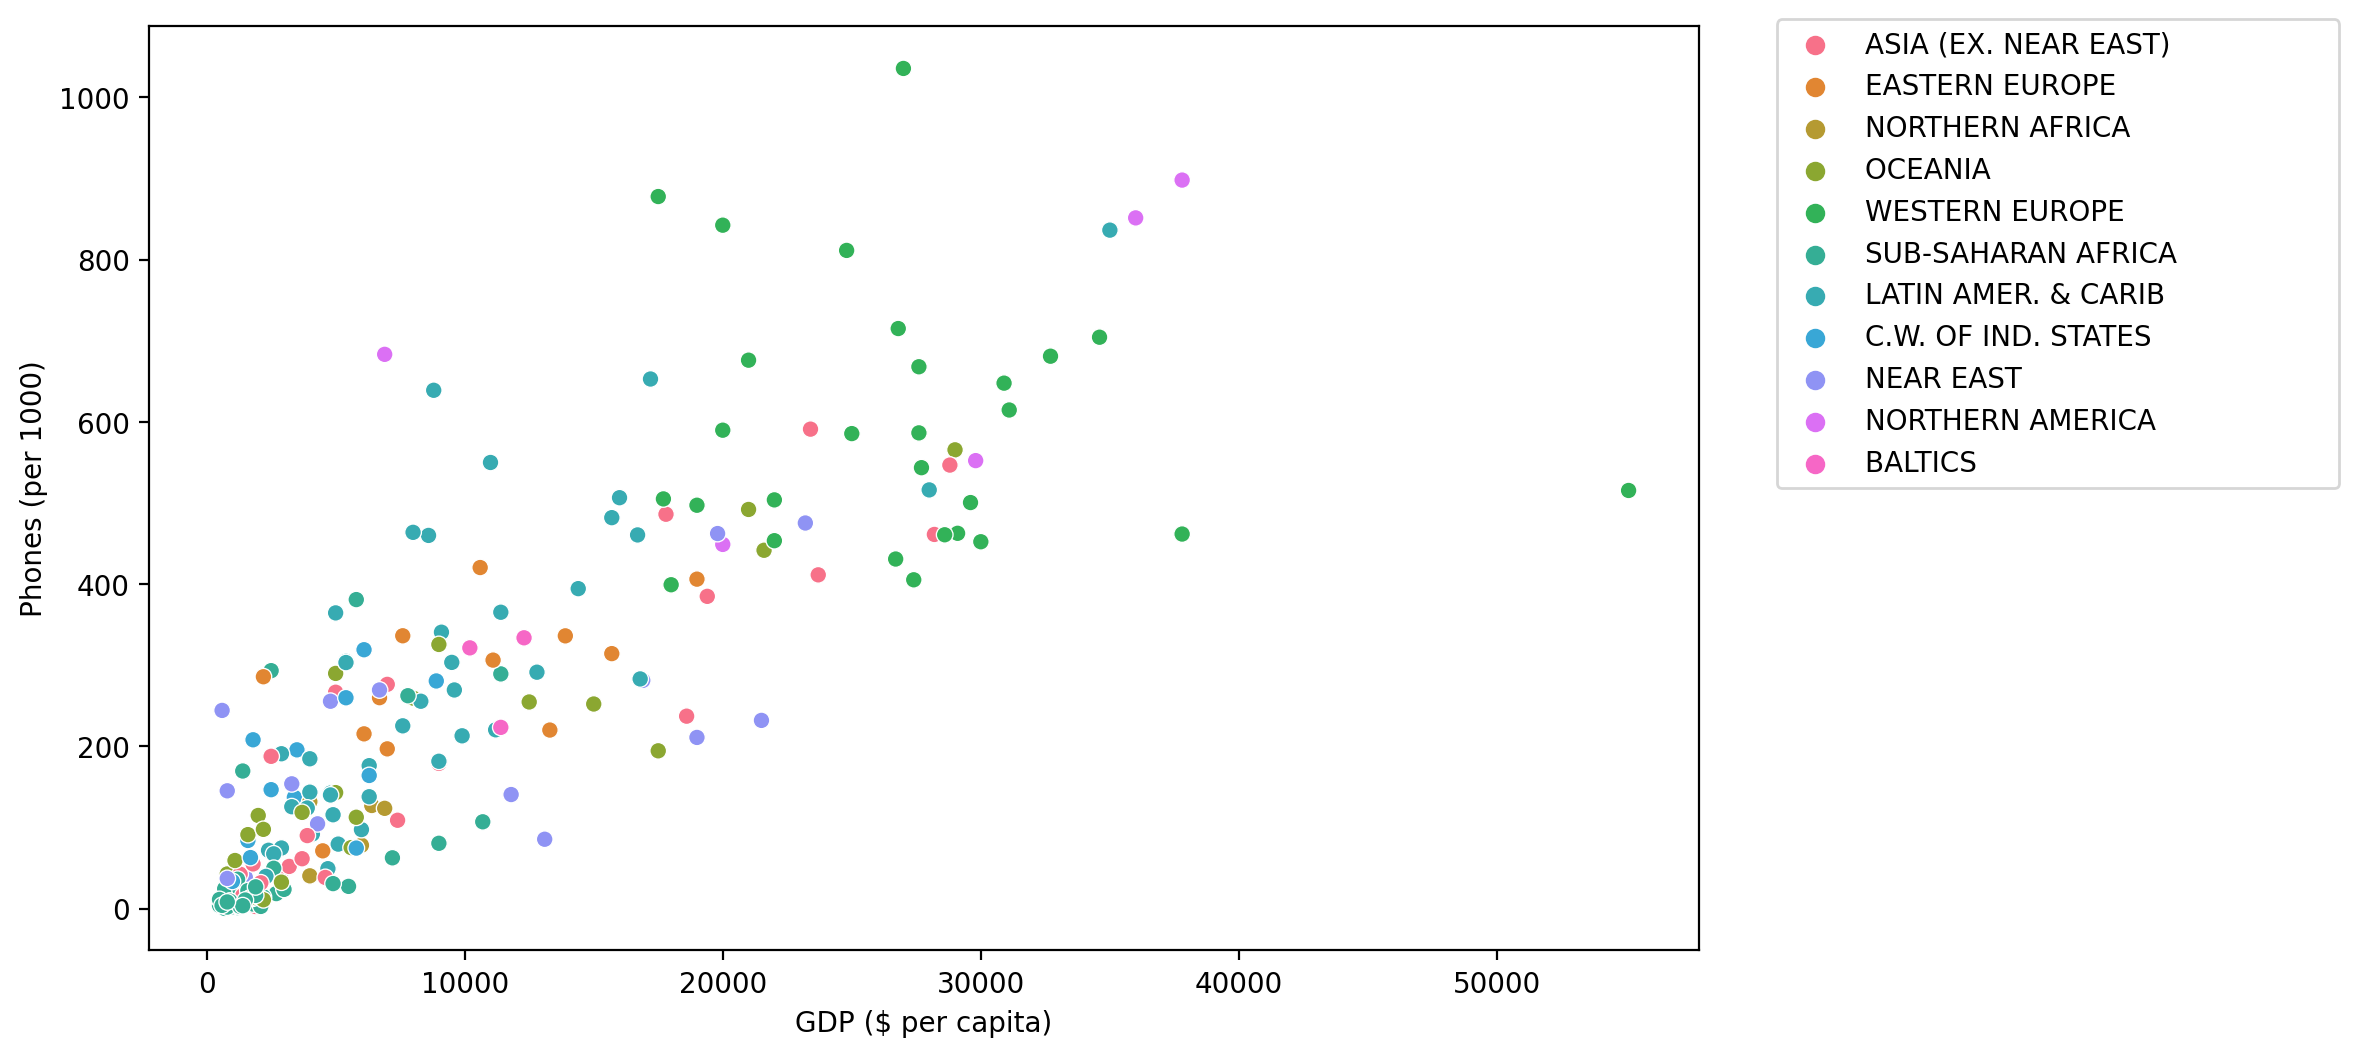

In [10]:
plt.figure(figsize=(10,6),dpi=200)
sns.scatterplot(data=df,x='GDP ($ per capita)',y='Phones (per 1000)',hue='Region')
plt.legend(loc=(1.05,0.5));

Можно отметить, что существует некая линейная взаимосвязь - чем больше ВВП, тем больше телефонов. Также можно заметить несколько выбросов, например особенно выделяется страна с высоким значением ВВП, но низким количеством телефонов и страну, в которой количество телефонов на 1000 человек превышает значение 1000 (т.е. телефонов больше, чем людей). Найдем эти страны.

In [11]:
# Страна, в которой количество телефонов превышает количество людей 
df[df['Phones (per 1000)'] > 900]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
138,Monaco,WESTERN EUROPE,32543,2,16271.5,205.0,7.75,5.43,27000.0,99.0,1035.6,0.0,0.0,100.0,NaN,9.19,12.91,0.17,NaN,NaN


In [12]:
# Страна с максимальным ВВП на душу населения
df[df['GDP ($ per capita)'] > 50000]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
121,Luxembourg,WESTERN EUROPE,474413,2586,183.5,0.0,8.97,4.81,55100.0,100.0,515.4,23.28,0.4,76.32,NaN,11.94,8.41,0.01,0.13,0.86


**Построим график scatterplot для колонок "GDP per Capita" и "Literacy" (раскрасим график по колонке Region).**

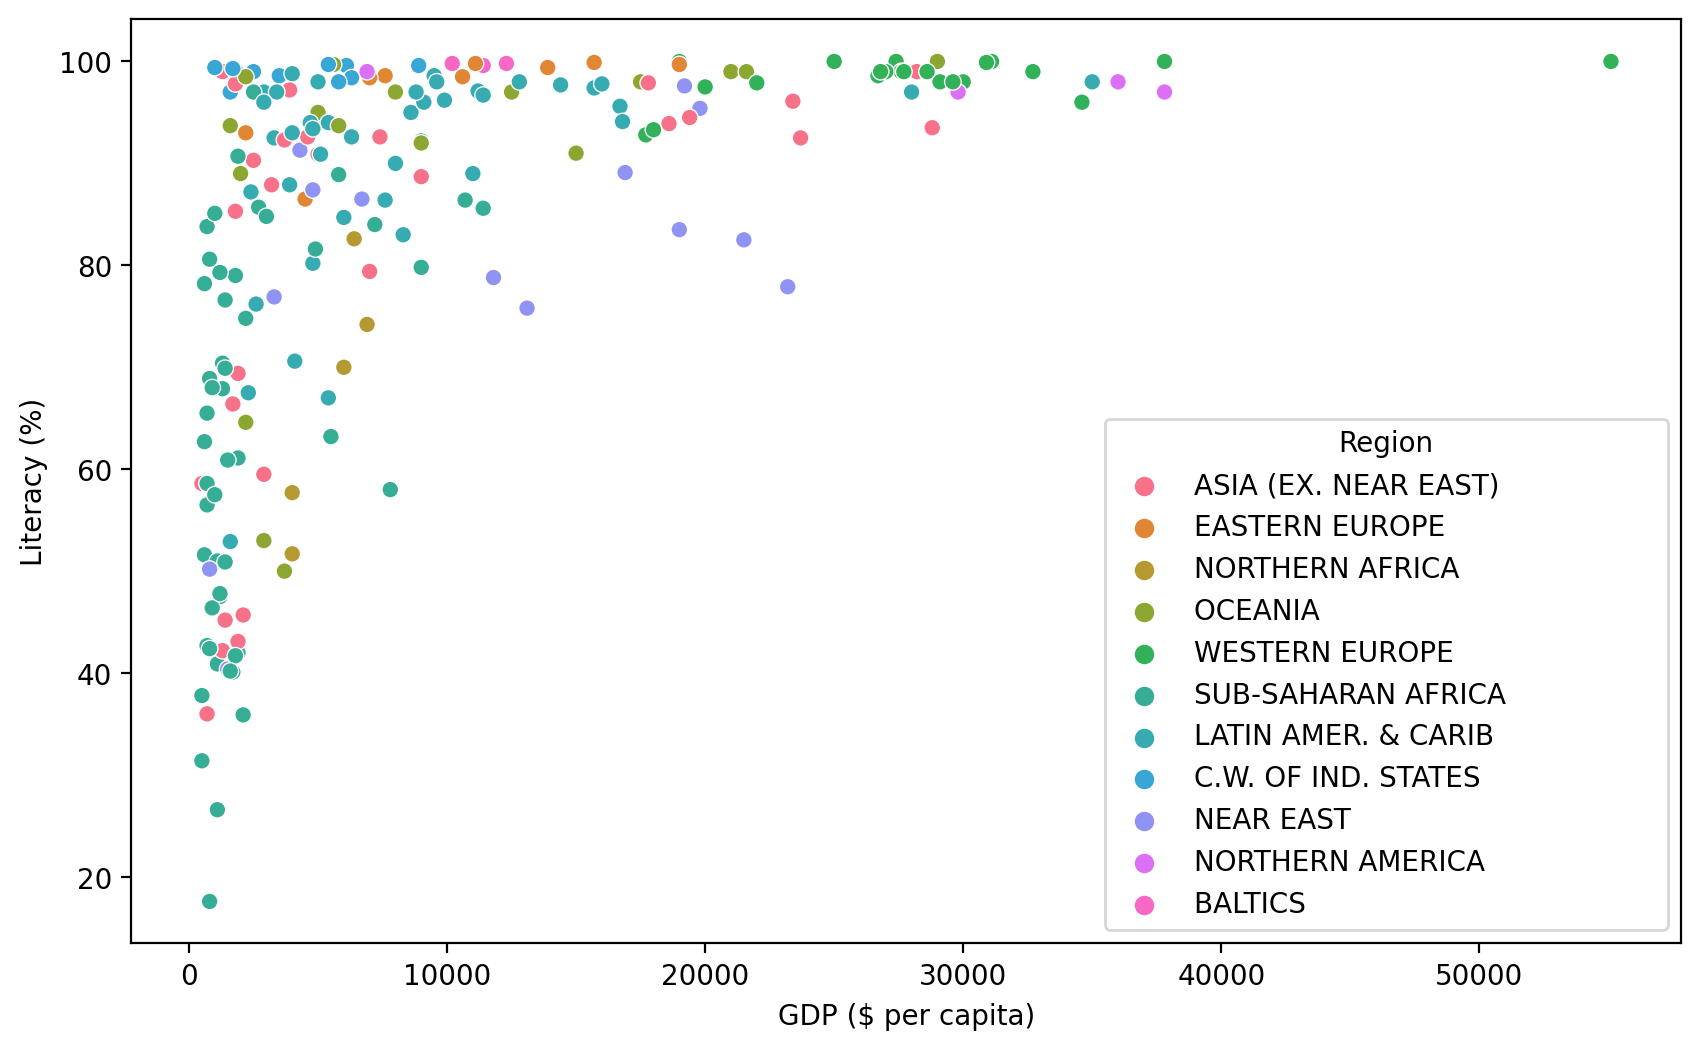

In [13]:
plt.figure(figsize=(10,6),dpi=200)
sns.scatterplot(data=df,x='GDP ($ per capita)',y='Literacy (%)',hue='Region');

На этом графике мы видим, что для тех стран, где ВВП на душу населения низкий - процент грамотных людей принимает самые разнообразные значения. Но с увеличением значения ВВП уровень грамотного населения резко повышается.

**Построим тепловую карту Heatmap для корреляций между колонками в датафрейме.**

**Построим график clustermap для корреляций между колонками датафрейма.**

<AxesSubplot:>

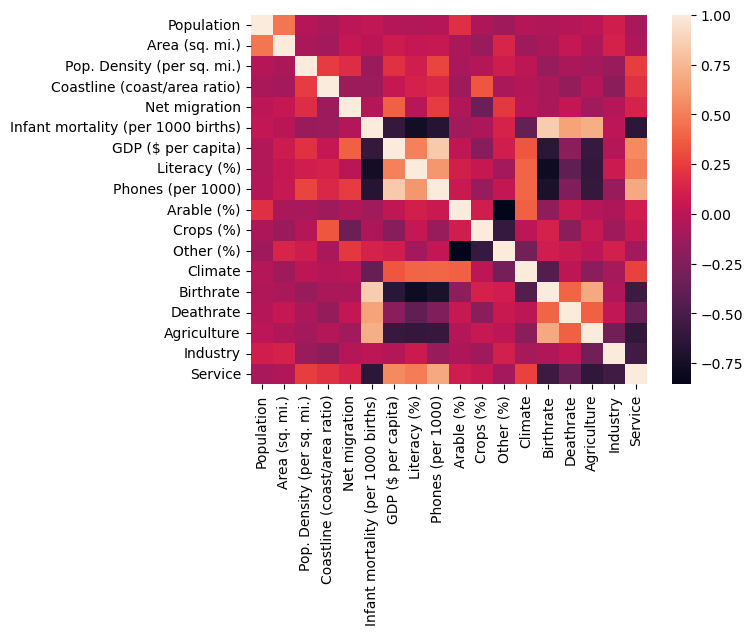

In [14]:
sns.heatmap(df.corr())

На графике видно, что признаки Birthrate и Infant mortality очень сильно связаны между собой.

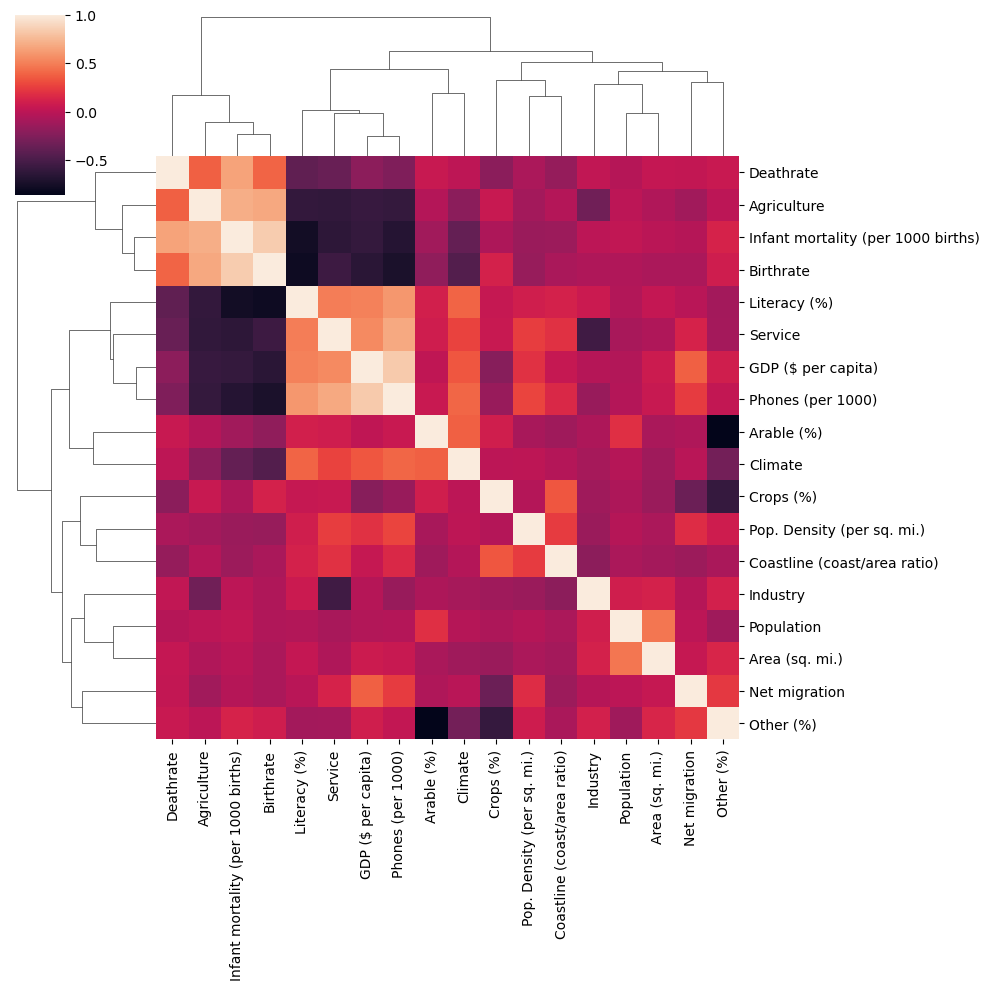

In [15]:
sns.clustermap(df.corr());

На графике видно, что признаки сгруппировались на три блока: первый блок включает показатели рождаемости и смертности, второй блок - признаки, характеризующие общий уровень развития страны. И далее идут уже меньшие объединения признаков.

-----

## Подготовка данных и модель данных

Подготовим данные для кластеризации с помощью метода К-средних!

### Отсутствующие данные (Missing Data)

**Построим отчёт - сколько строк имеют отсутствующие значения в той или иной колонке.**

In [16]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

**Посмотрим для каких стран в колонке Agriculture значения NaN? Что эти страны имеют общего между собой?**

In [17]:
df[df['Agriculture'].isnull()]['Country']

3            American Samoa
4                   Andorra
78                Gibraltar
80                Greenland
83                     Guam
134                 Mayotte
140              Montserrat
144                   Nauru
153      N. Mariana Islands
171            Saint Helena
174    St Pierre & Miquelon
177              San Marino
208       Turks & Caicos Is
221       Wallis and Futuna
223          Western Sahara
Name: Country, dtype: object

**Большинство этих стран являются маленькими островами, кроме Гринландии и Западной Сахары. Заменим для этих стран отсутствующие значения нулями, потому что это очень маленькие страны.**  

In [18]:
# Обнуляем неопределённые значения для маленьких островов
df[df['Agriculture'].isnull()] = df[df['Agriculture'].isnull()].fillna(0)

**Проверим заново, в каких колонках сколько строк имеют неопределённые значения:**

In [19]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          1
Infant mortality (per 1000 births)     1
GDP ($ per capita)                     0
Literacy (%)                          13
Phones (per 1000)                      2
Arable (%)                             1
Crops (%)                              1
Other (%)                              1
Climate                               18
Birthrate                              1
Deathrate                              2
Agriculture                            0
Industry                               1
Service                                1
dtype: int64

**Колонка "climate" пустая для нескольких стран. Но для всех стран заполнена колонка Region. Пользуясь этим, заменим отсутствующие значения колонки Climate на средние значения этой колонки, где усреднение выполняется для соответствующего региона.**

In [20]:
df['Climate'] = df['Climate'].fillna(df.groupby('Region')['Climate'].transform('mean'))

**Проверим заново, сколько теперь отсутствующих значений.**

In [21]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          1
Infant mortality (per 1000 births)     1
GDP ($ per capita)                     0
Literacy (%)                          13
Phones (per 1000)                      2
Arable (%)                             1
Crops (%)                              1
Other (%)                              1
Climate                                0
Birthrate                              1
Deathrate                              2
Agriculture                            0
Industry                               1
Service                                1
dtype: int64

**Для колонки "Literacy percentage" применим такой же метод, что и ранее для колонки Climate. Заменим отсутствующие значения колонки Literacy % на средние значения этой колонки для соответствующего региона.**

In [22]:
df[df['Literacy (%)'].isnull()]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
25,Bosnia & Herzegovina,EASTERN EUROPE,4498976,51129,88.0,0.04,0.31,21.05,6100.0,NaN,215.4,13.60,2.96,83.44,4.000000,8.77,8.27,0.142,0.308,0.550
66,Faroe Islands,WESTERN EUROPE,47246,1399,33.8,79.84,1.41,6.24,22000.0,NaN,503.8,2.14,0.00,97.86,2.826087,14.05,8.70,0.270,0.110,0.620
74,Gaza Strip,NEAR EAST,1428757,360,3968.8,11.11,1.60,22.93,600.0,NaN,244.3,28.95,21.05,50.00,3.000000,39.45,3.80,0.030,0.283,0.687
85,Guernsey,WESTERN EUROPE,65409,78,838.6,64.10,3.84,4.71,20000.0,NaN,842.4,NaN,NaN,NaN,3.000000,8.81,10.01,0.030,0.100,0.870
99,Isle of Man,WESTERN EUROPE,75441,572,131.9,27.97,5.36,5.93,21000.0,NaN,676.0,9.00,0.00,91.00,3.000000,11.05,11.19,0.010,0.130,0.860
104,Jersey,WESTERN EUROPE,91084,116,785.2,60.34,2.76,5.24,24800.0,NaN,811.3,0.00,0.00,100.00,3.000000,9.30,9.28,0.050,0.020,0.930
108,Kiribati,OCEANIA,105432,811,130.0,140.94,0.00,48.52,800.0,NaN,42.7,2.74,50.68,46.58,2.000000,30.65,8.26,0.089,0.242,0.668
123,Macedonia,EASTERN EUROPE,2050554,25333,80.9,0.00,-1.45,10.09,6700.0,NaN,260.0,22.26,1.81,75.93,3.000000,12.02,8.77,0.118,0.319,0.563
185,Slovakia,EASTERN EUROPE,5439448,48845,111.4,0.00,0.30,7.41,13300.0,NaN,220.1,30.16,2.62,67.22,3.000000,10.65,9.45,0.035,0.294,0.672
187,Solomon Islands,OCEANIA,552438,28450,19.4,18.67,0.00,21.29,1700.0,NaN,13.4,0.64,2.00,97.36,2.000000,30.01,3.92,0.420,0.110,0.470


In [23]:
df['Literacy (%)'] = df['Literacy (%)'].fillna(df.groupby('Region')['Literacy (%)'].transform('mean'))

**Проверим заново, сколько теперь отсутствующих значений.**

In [24]:
df.isnull().sum()

Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         1
Infant mortality (per 1000 births)    1
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     2
Arable (%)                            1
Crops (%)                             1
Other (%)                             1
Climate                               0
Birthrate                             1
Deathrate                             2
Agriculture                           0
Industry                              1
Service                               1
dtype: int64

**Теперь данные отсутствуют только для нескольких стран. Удалим такие страны.**

In [25]:
df = df.dropna()

## Подготовка данных с признаками

**Подготовим данные для кластеризации. Колонка Country является уникальным идентификатором, поэтому эта колонка не будет полезной для кластеризации, поскольку она содержит уникальные значения для каждой строки. При создании датафрейма с наборами признаков X удалим эту колонку Country.**

In [26]:
X = df.drop("Country",axis=1)

**Создадим набор признаков X, причём колонка Region всё ещё является категориальной, поэтому для этой колонки создадим дамми-переменные с помощью Pandas.**

In [27]:
X = pd.get_dummies(X)

In [28]:
X.head()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),...,Region_BALTICS,Region_C.W. OF IND. STATES,Region_EASTERN EUROPE,Region_LATIN AMER. & CARIB,Region_NEAR EAST,Region_NORTHERN AFRICA,Region_NORTHERN AMERICA,Region_OCEANIA,Region_SUB-SAHARAN AFRICA,Region_WESTERN EUROPE
0,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,...,0,0,0,0,0,0,0,0,0,0
1,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,...,0,0,1,0,0,0,0,0,0,0
2,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,...,0,0,0,0,0,1,0,0,0,0
3,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,...,0,0,0,0,0,0,0,1,0,0
4,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,...,0,0,0,0,0,0,0,0,0,1


### Масштабирование данных

**Поскольку некоторые колонки измеряются в процентах, а некоторые в абсолютных значениях, то выполним масштабирование признаков**

In [29]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [30]:
scaled_X

array([[ 0.0133285 ,  0.01855412, -0.20308668, ..., -0.31544015,
        -0.54772256, -0.36514837],
       [-0.21730118, -0.32370888, -0.14378531, ..., -0.31544015,
        -0.54772256, -0.36514837],
       [ 0.02905136,  0.97784988, -0.22956327, ..., -0.31544015,
        -0.54772256, -0.36514837],
       ...,
       [-0.06726127, -0.04756396, -0.20881553, ..., -0.31544015,
        -0.54772256, -0.36514837],
       [-0.15081724,  0.07669798, -0.22840201, ..., -0.31544015,
         1.82574186, -0.36514837],
       [-0.14464933, -0.12356132, -0.2160153 , ..., -0.31544015,
         1.82574186, -0.36514837]])

### Создание и обучение модели Kmeans




**Напишем цикл for для создания и обучения нескольких моделей KMeans, проверяя количество кластеров K от 2 до 30. На каждом шаге цикла сохраним сумму квадратов расстояний от точек до центров кластеров (SSD - Sum of Squared Distances) для каждого значения K. Далее нанесем эти данные на график, изображая метрику SSD для различных значений К. Также построим график barplot с изменениями метрики SSD.**

In [31]:
ssd = []

for k in range(2,30):
    
    model = KMeans(n_clusters=k)
    model.fit(scaled_X)
    
    # Сумма квадратов расстояний (SSD - Sum of squared distances) от точек до центров кластеров
    ssd.append(model.inertia_)

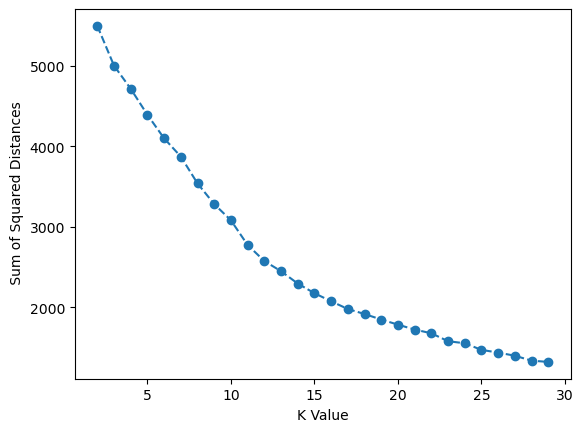

In [32]:
plt.plot(range(2,30),ssd,'o--')
plt.xlabel("K Value")
plt.ylabel(" Sum of Squared Distances");

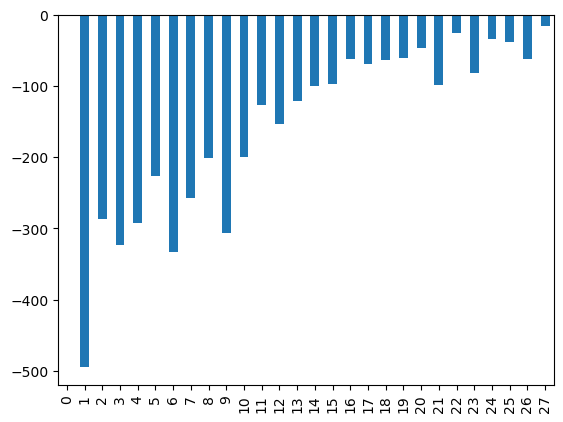

In [33]:
pd.Series(ssd).diff().plot(kind='bar');

-----

# Интерпретация модели


**Ответим на следующие вопросы: Какое значение K может быть хорошим выбором? Возможно таких значений несколько? Какие признаки влияют на формирование этих кластеров?**

Выберем K на основе метода локтя, а также посмотрим какие признаки влияют на создение кластеров.

-----


#### К примеру, выбираем K=3

**Можно сказать, что в точке K=3 падение метрики SSD более пологое (хотя метрика продолжает уменьшаться после этой точки). Посмотрим, какие признаки являются важными в случае 3 кластеров!**

In [34]:
model = KMeans(n_clusters=3)
model.fit(scaled_X)

KMeans(n_clusters=3)

In [35]:
model.labels_

array([1, 2, 2, 2, 0, 1, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 1,
       0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 1, 2, 1, 0, 2, 0, 1, 1, 2, 2, 2,
       1, 1, 1, 2, 1, 0, 2, 0, 0, 1, 2, 2, 2, 2, 2, 1, 1, 0, 1, 0, 2, 0,
       0, 2, 2, 1, 1, 2, 2, 0, 1, 0, 0, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 0,
       0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 1, 2, 2, 0, 2, 2, 1,
       0, 2, 1, 1, 2, 0, 0, 0, 0, 0, 1, 1, 2, 2, 1, 0, 2, 2, 1, 0, 1, 2,
       2, 2, 2, 2, 2, 1, 1, 2, 1, 0, 2, 2, 0, 2, 1, 1, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1,
       2, 1, 0, 0, 0, 2, 1, 1, 0, 2, 1, 2, 1, 0, 0, 2, 0, 2, 1, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       1])

In [36]:
X['K=3 Clusters'] = model.labels_

In [37]:
X.corr()['K=3 Clusters'].sort_values()

GDP ($ per capita)                           -0.589288
Region_WESTERN EUROPE                        -0.547311
Phones (per 1000)                            -0.496219
Climate                                      -0.407414
Net migration                                -0.353801
Deathrate                                    -0.339215
Region_EASTERN EUROPE                        -0.293640
Service                                      -0.252487
Arable (%)                                   -0.243172
Pop. Density (per sq. mi.)                   -0.176802
Region_BALTICS                               -0.175832
Literacy (%)                                 -0.124662
Region_SUB-SAHARAN AFRICA                    -0.119663
Region_NORTHERN AMERICA                      -0.083535
Area (sq. mi.)                                0.024339
Other (%)                                     0.061386
Region_ASIA (EX. NEAR EAST)                   0.064209
Coastline (coast/area ratio)                  0.073664
Industry  

<AxesSubplot:>

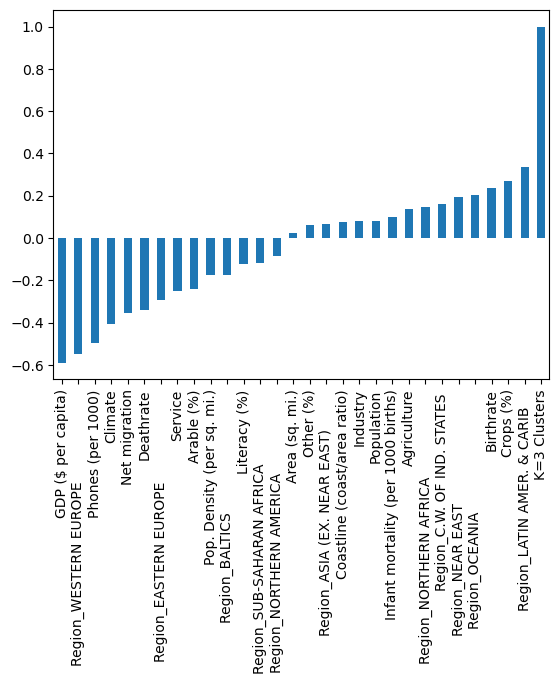

In [38]:
X.corr()['K=3 Clusters'].sort_values().plot(kind='bar')

Сильно коррелируют признаки Region_LATIN AMER & CARIB и Region_OCEANIA (положительная корреляция). А сильная отрицательная корреляция с признаками GDP ($ per capita) и Region_WESTERN EUROPE.

------------

## Географическая интерпретация модели

Результаты этой модели можно очень удобно визуализировать на географической карте.

**Задание: Создайте кластеры для выбранного значения K. В нашем варианте решений мы думаем, что варианты K=3 или K=15 являются разумными вариантами. Но Вы можете попробовать и другие варианты для количества кластеров.**

In [39]:
model = KMeans(n_clusters=15)
model.fit(scaled_X)

KMeans(n_clusters=15)

In [40]:
model = KMeans(n_clusters=3)
model.fit(scaled_X)

KMeans(n_clusters=3)

**Нанесем эти страны и кластеры на географическую карту.**

Используем файл и ISO-кодами: **"country_iso_codes.csv"**
С помощью номеров кластеров для стран, кодов ISO и названий стран построим карту мира с помощью plotly.

In [41]:
iso_codes = pd.read_csv("country_iso_codes.csv")

In [42]:
iso_codes

,Country,ISO Code
0,Afghanistan,AFG
1,"Akrotiri and Dhekelia – See United Kingdom, The","Akrotiri and Dhekelia – See United Kingdom, The"
2,Åland Islands,ALA
3,Albania,ALB
4,Algeria,DZA
...,...,...
296,"Congo, Dem. Rep.",COD
297,"Congo, Repub. of the",COG
298,Tanzania,TZA
299,Central African Rep.,CAF


In [49]:
# Создадим словарь, в котором ключом будет название страны, а значением ISO-код, чтобы добавить ISO-коды в начальный датафрейм
iso_mapping = iso_codes.set_index('Country')['ISO Code'].to_dict()

In [44]:
iso_mapping

{'Afghanistan': 'AFG',
 'Akrotiri and Dhekelia – See United Kingdom, The': 'Akrotiri and Dhekelia – See United Kingdom, The',
 'Åland Islands': 'ALA',
 'Albania': 'ALB',
 'Algeria': 'DZA',
 'American Samoa': 'ASM',
 'Andorra': 'AND',
 'Angola': 'AGO',
 'Anguilla': 'AIA',
 'Antarctica\u200a[a]': 'ATA',
 'Antigua and Barbuda': 'ATG',
 'Argentina': 'ARG',
 'Armenia': 'ARM',
 'Aruba': 'ABW',
 'Ashmore and Cartier Islands – See Australia.': 'Ashmore and Cartier Islands – See Australia.',
 'Australia\u200a[b]': 'AUS',
 'Austria': 'AUT',
 'Azerbaijan': 'AZE',
 'Bahamas (the)': 'BHS',
 'Bahrain': 'BHR',
 'Bangladesh': 'BGD',
 'Barbados': 'BRB',
 'Belarus': 'BLR',
 'Belgium': 'BEL',
 'Belize': 'BLZ',
 'Benin': 'BEN',
 'Bermuda': 'BMU',
 'Bhutan': 'BTN',
 'Bolivia (Plurinational State of)': 'BOL',
 'Bonaire\xa0Sint Eustatius\xa0Saba': 'BES',
 'Bosnia and Herzegovina': 'BIH',
 'Botswana': 'BWA',
 'Bouvet Island': 'BVT',
 'Brazil': 'BRA',
 'British Indian Ocean Territory (the)': 'IOT',
 'British V

In [45]:
df['ISO Code'] = df['Country'].map(iso_mapping)

In [50]:
# Добавим в датафрейм колонку с номерами кластеров
df['Cluster'] = model.labels_

In [51]:
import plotly.express as px

fig = px.choropleth(df, locations="ISO Code",
                    color="Cluster", # lifeExp is a column of gapminder
                    hover_name="Country", # column to add to hover information
                    )
fig.show()

---